# SMART FARMING MACHINE LEARNING

Menggunakan dataset dari kaggle dengan menggunakan sistem fuzzy dan membangun sistem untuk dunia smart farming.

Sistem yang akan dibangun dalam kali ini meliputi:
PENDUKUNG KEPUTUSAN PREDIKSI HASIL PANEN (CROP YIELD) BERBASIS FUZZY LOGIC
yang akan mendeteksi keputusan dalam dunia farming berdasarkan:

1.Kondisi tanah
2.Lingkungan
3.Kesehatan tanaman

KETENTUAN INPUT:
Variabel	Range Angka	Satuan
Soil Moisture (Kelembapan Tanah)	0 SAMPAI 100	%
Temperature (Suhu)	0 SAMPAI 50	°C
NDVI(Normalized Difference Vegetation Index)	0 SAMPAI 1	tanpa satuan

Yield (Output)	0 SAMPAI 100	skala hasil

#Penjelasan mengenai variabel yang digunakan
- Soil moisture menunjukkan persentase kandungan air di dalam tanah
- Temperature Suhu lingkungan memengaruhi proses fisiologis tanaman
- NVDI indeks yang digunakan untuk menilai tingkat kesehatan vegetasi berdasarkan pantulan cahaya inframerah dan cahaya merah dari daun tanaman

#TAHAPAN YANG AKAN DILAKUKAN
Input → Fuzzifikasi → Rule → Inferensi → Defuzzifikasi → Output


In [1]:
#IMPORT LIBRARY YANG AKAN DIGUNAKAN
# Library dasar
import numpy as np
import pandas as pd

# Library visualisasi
import matplotlib.pyplot as plt

# Library fuzzy logic
!pip install scikit-fuzzy
import skfuzzy as fuzz
from skfuzzy import control as ctrl


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 31.1 MB/s eta 0:00:00


In [3]:
#LOAD DATASET BERDASARKAN CSV YANG SUDAH DIUPLOAD DI SISI KIRI
# Pastikan file 'Smart_Farming_Crop_Yield_2024.csv' sudah diunggah ke sesi Colab Anda.
# Anda bisa mengunggahnya secara manual melalui panel File di sebelah kiri atau dengan kode:
# from google.colab import files
# files.upload()

# Setelah diunggah, path yang benar mungkin '/content/Smart_Farming_Crop_Yield_2024.csv'
# Atau jika diunggah langsung ke root folder sesi, '/Smart_Farming_Crop_Yield_2024.csv' bisa bekerja.

# Memuat dataset
df = pd.read_csv('/Smart_Farming_Crop_Yield_2024.csv')

# Tampilkan 5 data teratas
df.head(5)

,farm_id,region,crop_type,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,irrigation_type,...,sowing_date,harvest_date,total_days,yield_kg_per_hectare,sensor_id,timestamp,latitude,longitude,NDVI_index,crop_disease_status
0,FARM0001,North India,Wheat,35.95,5.99,17.79,75.62,77.03,7.27,NaN,...,2024-01-08,2024-05-09,122,4408.07,SENS0001,2024-03-19,14.970941,82.997689,0.63,Mild
1,FARM0002,South USA,Soybean,19.74,7.24,30.18,89.91,61.13,5.67,Sprinkler,...,2024-02-04,2024-05-26,112,5389.98,SENS0002,2024-04-21,16.613022,70.869009,0.58,NaN
2,FARM0003,South USA,Wheat,29.32,7.16,27.37,265.43,68.87,8.23,Drip,...,2024-02-03,2024-06-26,144,2931.16,SENS0003,2024-02-28,19.503156,79.068206,0.80,Mild
3,FARM0004,Central USA,Maize,17.33,6.03,33.73,212.01,70.46,5.03,Sprinkler,...,2024-02-21,2024-07-04,134,4227.80,SENS0004,2024-05-14,31.071298,85.519998,0.44,NaN
4,FARM0005,Central USA,Cotton,19.37,5.92,33.86,269.09,55.73,7.93,NaN,...,2024-02-05,2024-05-20,105,4979.96,SENS0005,2024-04-13,16.568540,81.691720,0.84,Severe


In [4]:
from google.colab import files

print("/content/Smart_Farming_Crop_Yield_2024.csv' untuk diunggah:")
files.upload()

/content/Smart_Farming_Crop_Yield_2024.csv' untuk diunggah:


Saving Smart_Farming_Crop_Yield_2024.csv to Smart_Farming_Crop_Yield_2024.csv


{'Smart_Farming_Crop_Yield_2024.csv': b'farm_id,region,crop_type,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,irrigation_type,fertilizer_type,pesticide_usage_ml,sowing_date,harvest_date,total_days,yield_kg_per_hectare,sensor_id,timestamp,latitude,longitude,NDVI_index,crop_disease_status\nFARM0001,North India,Wheat,35.95,5.99,17.79,75.62,77.03,7.27,None,Organic,6.34,2024-01-08,2024-05-09,122,4408.07,SENS0001,2024-03-19,14.970941,82.997689,0.63,Mild\nFARM0002,South USA,Soybean,19.74,7.24,30.18,89.91,61.13,5.67,Sprinkler,Inorganic,9.6,2024-02-04,2024-05-26,112,5389.98,SENS0002,2024-04-21,16.613022,70.869009,0.58,None\nFARM0003,South USA,Wheat,29.32,7.16,27.37,265.43,68.87,8.23,Drip,Mixed,15.26,2024-02-03,2024-06-26,144,2931.16,SENS0003,2024-02-28,19.503156,79.068206,0.8,Mild\nFARM0004,Central USA,Maize,17.33,6.03,33.73,212.01,70.46,5.03,Sprinkler,Organic,25.8,2024-02-21,2024-07-04,134,4227.8,SENS0004,2024-05-14,31.071298,85.519998,0.44,None\nFARM0005,Central

In [ ]:
# Informasi dataset
# 22 KOLOM 500 LINE DATASET
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   farm_id               500 non-null    object 
 1   region                500 non-null    object 
 2   crop_type             500 non-null    object 
 3   soil_moisture_%       500 non-null    float64
 4   soil_pH               500 non-null    float64
 5   temperature_C         500 non-null    float64
 6   rainfall_mm           500 non-null    float64
 7   humidity_%            500 non-null    float64
 8   sunlight_hours        500 non-null    float64
 9   irrigation_type       350 non-null    object 
 10  fertilizer_type       500 non-null    object 
 11  pesticide_usage_ml    500 non-null    float64
 12  sowing_date           500 non-null    object 
 13  harvest_date          500 non-null    object 
 14  total_days            500 non-null    int64  
 15  yield_kg_per_hectare  5

In [5]:
df.describe()

,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,pesticide_usage_ml,total_days,yield_kg_per_hectare,latitude,longitude,NDVI_index
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,26.750140,6.523980,24.675740,181.685740,65.194460,7.03014,26.586980,119.496000,4032.92694,22.442473,80.392248,0.602060
std,10.150053,0.585558,5.348899,72.293091,14.642849,1.69167,13.202429,16.798046,1174.43304,7.283492,5.910664,0.175402
min,10.160000,5.510000,15.000000,50.170000,40.230000,4.01000,5.050000,90.000000,2023.56000,10.004243,70.020021,0.300000
25%,17.890000,6.030000,20.295000,119.217500,51.865000,5.66750,14.945000,105.750000,2994.82000,16.263202,75.374713,0.447500
50%,25.855000,6.530000,24.655000,191.545000,65.685000,6.99500,25.980000,119.000000,4071.69000,21.981743,80.650284,0.610000
75%,36.022500,7.040000,29.090000,239.035000,77.995000,8.47000,38.005000,134.000000,5062.11000,28.528948,85.654629,0.750000
max,44.980000,7.500000,34.840000,298.960000,90.000000,10.00000,49.940000,150.000000,5998.29000,34.981531,89.991901,0.900000


# MENENTUKAN FEATURES



In [ ]:
#menentukan features
input_features = [
    'soil_moisture_%',
    'soil_pH',
    'temperature_C',
    'rainfall_mm',
    'humidity_%',
    'sunlight_hours',
    'NDVI_index'
]


In [ ]:
#Menampilan output feature
df_input = df[input_features]
df_input.head(10)

,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,NDVI_index
0,35.95,5.99,17.79,75.62,77.03,7.27,0.63
1,19.74,7.24,30.18,89.91,61.13,5.67,0.58
2,29.32,7.16,27.37,265.43,68.87,8.23,0.80
3,17.33,6.03,33.73,212.01,70.46,5.03,0.44
4,19.37,5.92,33.86,269.09,55.73,7.93,0.84
5,44.91,5.78,24.87,238.95,83.06,4.92,0.82
6,36.28,7.04,21.80,123.38,47.91,4.02,0.76
7,27.10,5.72,22.26,296.33,80.34,5.44,0.70
8,40.54,6.35,19.24,184.82,76.50,5.21,0.50
9,10.25,6.92,16.18,66.85,41.57,5.98,0.58


In [ ]:
#Mengambil sample data dari dataset
sample_data = df.iloc[4]
sample_data[input_features]


,4
soil_moisture_%,19.37
soil_pH,5.92
temperature_C,33.86
rainfall_mm,269.09
humidity_%,55.73
sunlight_hours,7.93
NDVI_index,0.84


# Menentukan range yang akan digunakan untuk dimasukkan dalam sistem fuzzy

In [ ]:
# Menentukan range dari dataset
soil_moisture_range = np.arange(df['soil_moisture_%'].min(), df['soil_moisture_%'].max(), 1)
temperature_range   = np.arange(df['temperature_C'].min(), df['temperature_C'].max(), 1)
ndvi_range          = np.arange(df['NDVI_index'].min(), df['NDVI_index'].max(), 0.01)
yield_range         = np.arange(df['yield_kg_per_hectare'].min(), df['yield_kg_per_hectare'].max(), 10)



#Membuat variabel fuzzy
Antecedent → input
Consequent → output


In [ ]:
# Variabel input fuzzy
soil_moisture = ctrl.Antecedent(soil_moisture_range, 'soil_moisture')
temperature   = ctrl.Antecedent(temperature_range, 'temperature')
ndvi          = ctrl.Antecedent(ndvi_range, 'ndvi')

# Variabel output fuzzy
yield_fuzzy = ctrl.Consequent(yield_range, 'yield')


# Mendefinisikan kelembapan tanah dari low hingga high

In [ ]:
#Mendefinisikan soil moisture
soil_moisture['low'] = fuzz.trimf(soil_moisture.universe, [
    soil_moisture_range.min(),
    soil_moisture_range.min(),
    soil_moisture_range.mean()
])

soil_moisture['medium'] = fuzz.trimf(soil_moisture.universe, [
    soil_moisture_range.min(),
    soil_moisture_range.mean(),
    soil_moisture_range.max()
])

soil_moisture['high'] = fuzz.trimf(soil_moisture.universe, [
    soil_moisture_range.mean(),
    soil_moisture_range.max(),
    soil_moisture_range.max()
])


#Mendefinisikan temperatur dari low hingga high

In [ ]:
#Mendefinisikan temperature
temperature['low'] = fuzz.trimf(temperature.universe, [
    temperature_range.min(),
    temperature_range.min(),
    temperature_range.mean()
])

temperature['medium'] = fuzz.trimf(temperature.universe, [
    temperature_range.min(),
    temperature_range.mean(),
    temperature_range.max()
])

temperature['high'] = fuzz.trimf(temperature.universe, [
    temperature_range.mean(),
    temperature_range.max(),
    temperature_range.max()
])


#Mendefinisikan NDVI dari low hingga high

In [ ]:
#mendefinisikan NDVI
ndvi['low'] = fuzz.trimf(ndvi.universe, [
    ndvi_range.min(),
    ndvi_range.min(),
    ndvi_range.mean()
])

ndvi['medium'] = fuzz.trimf(ndvi.universe, [
    ndvi_range.min(),
    ndvi_range.mean(),
    ndvi_range.max()
])

ndvi['high'] = fuzz.trimf(ndvi.universe, [
    ndvi_range.mean(),
    ndvi_range.max(),
    ndvi_range.max()
])


#Output dari hasil panen

In [ ]:
#output dari hasil panen
yield_fuzzy['low'] = fuzz.trimf(yield_fuzzy.universe, [
    yield_range.min(),
    yield_range.min(),
    yield_range.mean()
])

yield_fuzzy['medium'] = fuzz.trimf(yield_fuzzy.universe, [
    yield_range.min(),
    yield_range.mean(),
    yield_range.max()
])

yield_fuzzy['high'] = fuzz.trimf(yield_fuzzy.universe, [
    yield_range.mean(),
    yield_range.max(),
    yield_range.max()
])


#Menampilkan grafik Grafik Soil Moisture

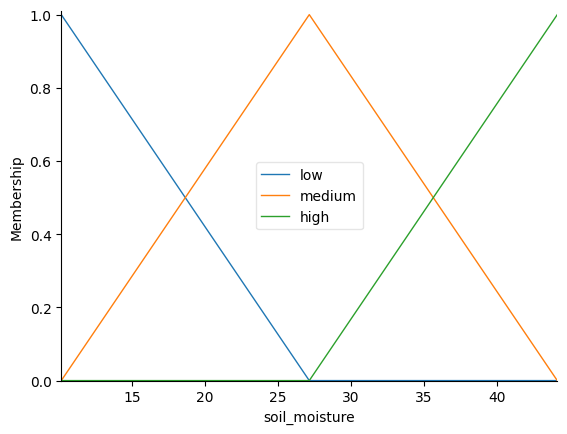

In [ ]:
#menampilkan grafik soil moisture
soil_moisture.view()
plt.show()


#Menampilkan grafik temperature

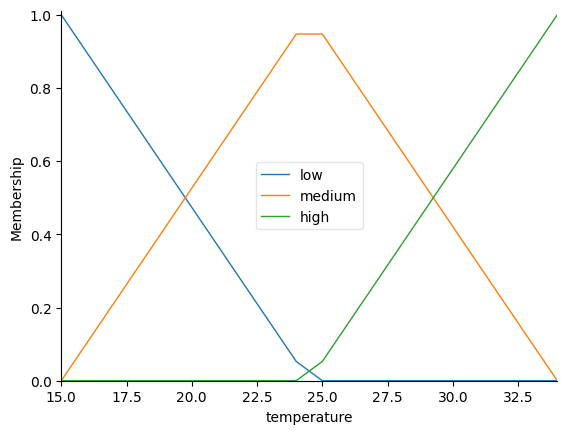

In [ ]:
#menampilkan grafik temperature
temperature.view()
plt.show()


#Menampilkan grafik NVDI

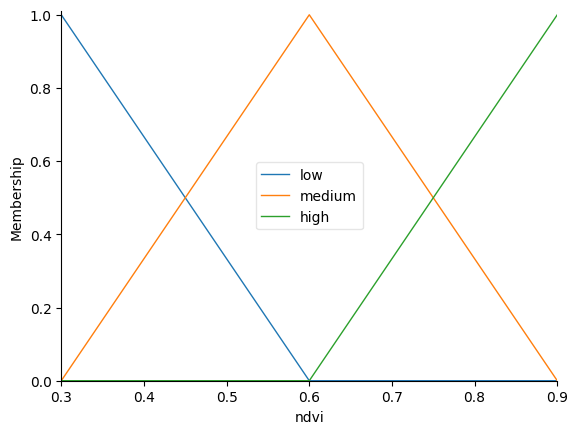

In [ ]:
#menampilkan grafik NDVI
ndvi.view()
plt.show()


#Membuat rule agar logika fuzzy dapat menentukan hasil berdasarkan dengan kondisinya

In [ ]:
# Daftar label fuzzy
levels = ['low', 'medium', 'high']

# Rule base dalam bentuk tabel (dictionary)
rule_base = {
    ('low', 'low', 'low'): 'low',
    ('low', 'low', 'medium'): 'low',
    ('low', 'low', 'high'): 'medium',

    ('low', 'medium', 'low'): 'low',
    ('low', 'medium', 'medium'): 'medium',
    ('low', 'medium', 'high'): 'medium',

    ('low', 'high', 'low'): 'low',
    ('low', 'high', 'medium'): 'low',
    ('low', 'high', 'high'): 'medium',

    ('medium', 'low', 'low'): 'low',
    ('medium', 'low', 'medium'): 'medium',
    ('medium', 'low', 'high'): 'medium',

    ('medium', 'medium', 'low'): 'medium',
    ('medium', 'medium', 'medium'): 'medium',
    ('medium', 'medium', 'high'): 'high',

    ('medium', 'high', 'low'): 'medium',
    ('medium', 'high', 'medium'): 'medium',
    ('medium', 'high', 'high'): 'high',

    ('high', 'low', 'low'): 'medium',
    ('high', 'low', 'medium'): 'medium',
    ('high', 'low', 'high'): 'high',

    ('high', 'medium', 'low'): 'medium',
    ('high', 'medium', 'medium'): 'high',
    ('high', 'medium', 'high'): 'high',

    ('high', 'high', 'low'): 'medium',
    ('high', 'high', 'medium'): 'high',
    ('high', 'high', 'high'): 'high',
}


In [ ]:
# Membuat daftar rule
rules = []

for (sm, temp, nd), out in rule_base.items():
    rule = ctrl.Rule(
        soil_moisture[sm] & temperature[temp] & ndvi[nd],
        yield_fuzzy[out]
    )
    rules.append(rule)

# Membentuk kontrol fuzzy
yield_ctrl = ctrl.ControlSystem(rules)

# Membuat simulasi fuzzy
yield_simulation = ctrl.ControlSystemSimulation(yield_ctrl)


In [ ]:
# Ambil 1 baris data (misalnya baris keempat)
data = df.iloc[4]

yield_simulation.input['soil_moisture'] = data['soil_moisture_%']
yield_simulation.input['temperature']   = data['temperature_C']
yield_simulation.input['ndvi']          = data['NDVI_index']



In [ ]:
# Jalankan proses fuzzy
yield_simulation.compute()

# Ambil hasil output
hasil_yield = yield_simulation.output['yield']

print("Hasil Prediksi Yield:", hasil_yield)


Hasil Prediksi Yield: 4449.6719067278955


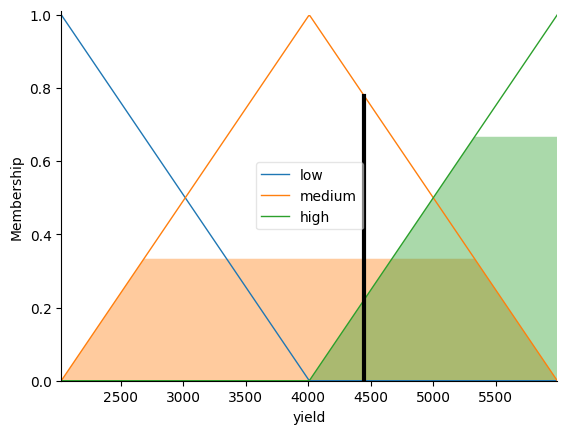

In [ ]:
#Visualisasi fuzzy
yield_fuzzy.view(sim=yield_simulation)
plt.show()


#Uji coba sistem dengan cara input manual seperti dibawah ini

In [ ]:
yield_simulation.input['soil_moisture'] = 40
yield_simulation.input['temperature']   = 28
yield_simulation.input['ndvi']          = 0.6

yield_simulation.compute()

print("Hasil Yield (Manual):", yield_simulation.output['yield'])


Hasil Yield (Manual): 4540.526975662309


# Hasil dari input manual diatas

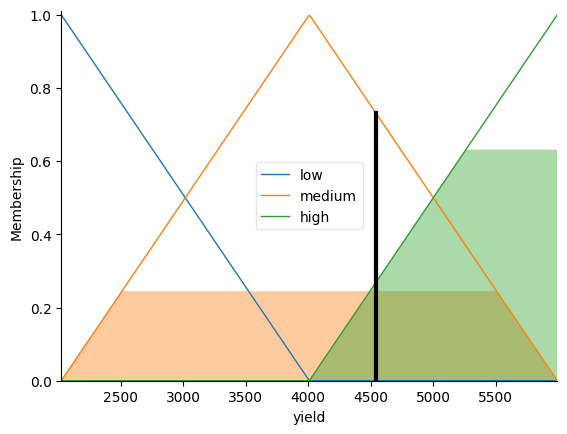

In [ ]:
# Menampilkan grafik hasil defuzzifikasi output
yield_fuzzy.view(sim=yield_simulation)
plt.show()


#Input manual menggunakan terminal

In [ ]:
# Input manual dari user
def input_manual():
    print("="*50)
    print("INPUT DATA SMART FARMING")
    print("="*50)

    soil = float(input("Masukkan Nilai Soil Moisture (0 – 100 %)            : "))
    temp = float(input("Masukkan Nilai Temperature (0 – 50 °C)             : "))
    ndvi = float(input("Masukkan Nilai NDVI (0 – 1)                          : "))

    print("\nData yang dimasukkan:")
    print(f"Soil Moisture : {soil} %")
    print(f"Temperature   : {temp} °C")
    print(f"NDVI          : {ndvi}")

    return soil, temp, ndvi



In [ ]:
soil, temp, ndvi = input_manual()

yield_simulation.input['soil_moisture'] = soil
yield_simulation.input['temperature']   = temp
yield_simulation.input['ndvi']          = ndvi

yield_simulation.compute()

print("\nHasil Defuzzifikasi Yield:")
print("Yield =", yield_simulation.output['yield'])



INPUT DATA SMART FARMING
Masukkan Nilai Soil Moisture (0 – 100 %)            : 40
Masukkan Nilai Temperature (0 – 50 °C)             : 28
Masukkan Nilai NDVI (0 – 1)                          : 0.6

Data yang dimasukkan:
Soil Moisture : 40.0 %
Temperature   : 28.0 °C
NDVI          : 0.6

Hasil Defuzzifikasi Yield:
Yield = 4540.526975662309


In [6]:
# menampilkan visualisasi grafik himpunan fuzzy
yield_fuzzy.view(sim=yield_simulation)


NameError: name 'yield_fuzzy' is not defined